In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
datafile = 'ex1data1.txt'
data = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True) #Load in data from original txt
#print(type(data))
#print(data.shape) #Check the dimension of data
#Form the original X matrix and y vector
print(data[0,:].shape)
data1 = data[0,:].reshape((1,97))
print(data1.shape)
data2 = data[1,:].reshape((1,97))
X = np.transpose(data1)
y = np.transpose(data2)
#print(X)
#print(y)
m = y.size # Number of training examples
X = np.insert(X,0,1,axis=1) # Insert the first column of 1s
print(X.shape)

(97,)
(1, 97)
[[17.592  ]
 [ 9.1302 ]
 [13.662  ]
 [11.854  ]
 [ 6.8233 ]
 [11.886  ]
 [ 4.3483 ]
 [12.     ]
 [ 6.5987 ]
 [ 3.8166 ]
 [ 3.2522 ]
 [15.505  ]
 [ 3.1551 ]
 [ 7.2258 ]
 [ 0.71618]
 [ 3.5129 ]
 [ 5.3048 ]
 [ 0.56077]
 [ 3.6518 ]
 [ 5.3893 ]
 [ 3.1386 ]
 [21.767  ]
 [ 4.263  ]
 [ 5.1875 ]
 [ 3.0825 ]
 [22.638  ]
 [13.501  ]
 [ 7.0467 ]
 [14.692  ]
 [24.147  ]
 [-1.22   ]
 [ 5.9966 ]
 [12.134  ]
 [ 1.8495 ]
 [ 6.5426 ]
 [ 4.5623 ]
 [ 4.1164 ]
 [ 3.3928 ]
 [10.117  ]
 [ 5.4974 ]
 [ 0.55657]
 [ 3.9115 ]
 [ 5.3854 ]
 [ 2.4406 ]
 [ 6.7318 ]
 [ 1.0463 ]
 [ 5.1337 ]
 [ 1.844  ]
 [ 8.0043 ]
 [ 1.0179 ]
 [ 6.7504 ]
 [ 1.8396 ]
 [ 4.2885 ]
 [ 4.9981 ]
 [ 1.4233 ]
 [-1.4211 ]
 [ 2.4756 ]
 [ 4.6042 ]
 [ 3.9624 ]
 [ 5.4141 ]
 [ 5.1694 ]
 [-0.74279]
 [17.929  ]
 [12.054  ]
 [17.054  ]
 [ 4.8852 ]
 [ 5.7442 ]
 [ 7.7754 ]
 [ 1.0173 ]
 [20.992  ]
 [ 6.6799 ]
 [ 4.0259 ]
 [ 1.2784 ]
 [ 3.3411 ]
 [-2.6807 ]
 [ 0.29678]
 [ 3.8845 ]
 [ 5.7014 ]
 [ 6.7526 ]
 [ 2.0576 ]
 [ 0.47953]
 [ 0.20421]
 [

Text(0.5, 0, 'Population of City in 10,000s')

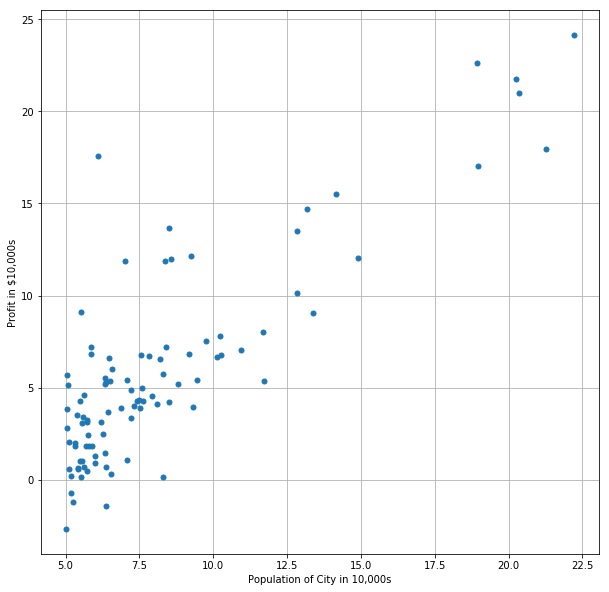

In [125]:
#Plot the data
plt.figure(figsize=(10,10))
plt.plot(X[:,1],y[:,0],'o',markersize=5)
plt.grid(True) 
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

In [28]:
iterations = 2000
alpha = 0.01

In [29]:
def hf(theta,X): #Linear hypothesis function hf = theta0 + theta1 * x = X.theta
    return np.dot(X,theta)
def computeCost(mytheta,X,y): #Cost function = 1/2m * (hf-y)exp2
    #where X - m,n; theta - n,1; y - m,1; n - features, m - training set
    return float((1./(2*m)) * np.dot((hf(mytheta,X)-y).T,(hf(mytheta,X)-y)))

#Test computeCost theta initials as 0s:
initialTheta = np.zeros((X.shape[1],1))
print(computeCost(initialTheta,X,y))

32.072733877455676


In [30]:
def descendGradient(X, theta):
    costHist = [] #Used to plot cost as function of iteration
    thetaHist = np.zeros((1,2)) #Initial for thetaHist

    for i in range(iterations):
        tmptheta = theta
        costHist.append(computeCost(theta,X,y))
        thetaHist = np.vstack((thetaHist, theta.T)) #Put theta.T into thetaHist
        #Simultaneously updating theta values
        for j in range(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((hf(theta,X) - y)*X[:,j].reshape(m,1))
        theta = tmptheta
    thetaHist = np.delete(thetaHist, 0, axis=0) # Delete the initials
    return theta, thetaHist, costHist


For the  1 th iteration, theta =  [0. 0.] , cost =  32.072733877455676
For the  100 th iteration, theta =  [-0.5748165   0.86000702] , cost =  5.481005847231589
For the  200 th iteration, theta =  [-1.12714315  0.91539439] , cost =  5.174805904386346
For the  300 th iteration, theta =  [-1.58760952  0.96157   ] , cost =  4.961987620918898
For the  400 th iteration, theta =  [-1.97149336  1.00006591] , cost =  4.814072434008096
For the  500 th iteration, theta =  [-2.2915315   1.03215936] , cost =  4.711266875376643
For the  600 th iteration, theta =  [-2.55834246  1.05891519] , cost =  4.639813881899386
For the  700 th iteration, theta =  [-2.78077872  1.08122112] , cost =  4.590151875828646
For the  800 th iteration, theta =  [-2.96622046  1.09981724] , cost =  4.555635269498426
For the  900 th iteration, theta =  [-3.12082043  1.11532054] , cost =  4.5316451771357
For the  1000 th iteration, theta =  [-3.24970808  1.1282454 ] , cost =  4.5149713324921645
For the  1100 th iteration, t

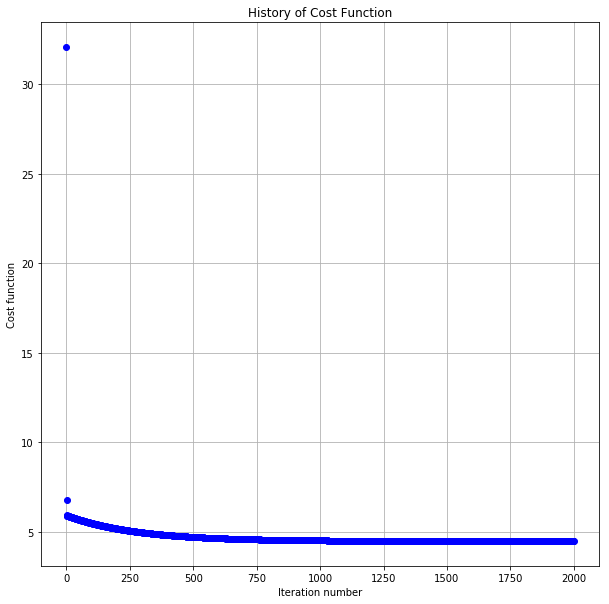

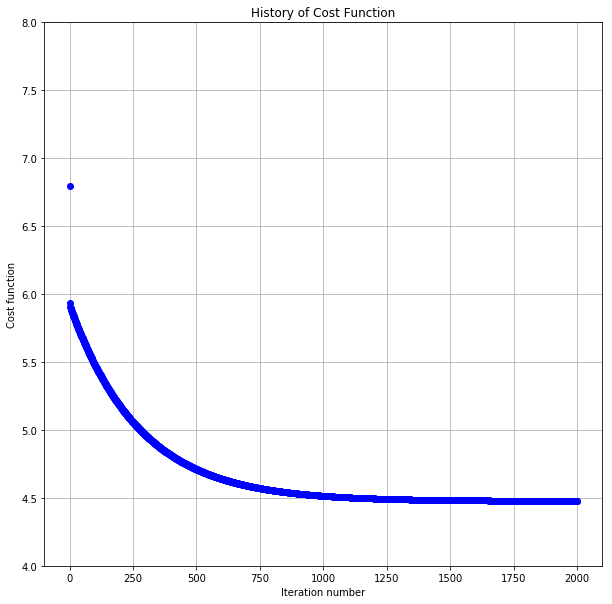

In [31]:
initial_theta = np.zeros((X.shape[1],1))
theta, thetaHist, costHist = descendGradient(X,initial_theta)

for i in range(iterations):
    if i == 0:
        print("For the ",i+1,"th iteration, theta = ",thetaHist[0,:],", cost = ",costHist[0])
    elif (i+1) % 100 == 0:
        print("For the ",i+1,"th iteration, theta = ",thetaHist[i,:],", cost = ",costHist[i])

#Plot the history of the cost function
def plotCostHist(costHist):
    plt.figure(figsize=(10,10))
    plt.plot(range(len(costHist)),costHist,'bo')
    plt.grid(True)
    plt.title("History of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
plotCostHist(costHist)
plotCostHist(costHist)
dummy = plt.ylim([4,8]) # Got a better view by trimming the y(4,8)

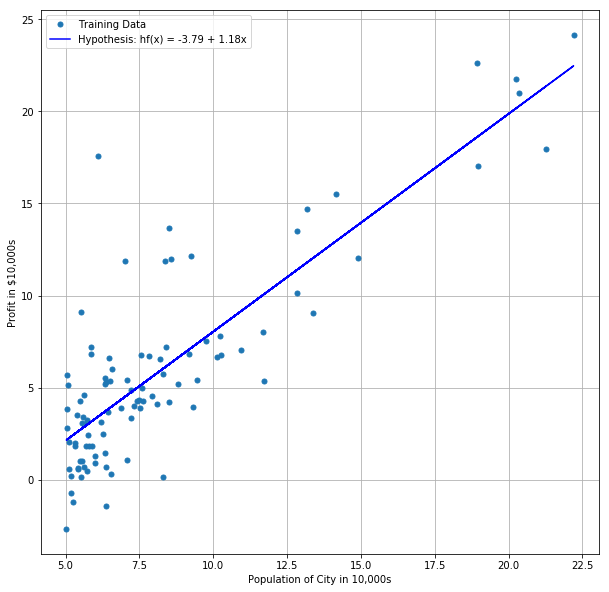

In [162]:
#Plot the line on top of the data to see the linear fuction
def lastHf(x):
    return theta[0] + theta[1]*x
plt.figure(figsize=(10,10))
plt.plot(X[:,1],y[:,0],'o',markersize=5,label='Training Data')
plt.plot(X[:,1],lastHf(X[:,1]),'b-',label = 'Hypothesis: hf(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()